# BeyonCE - Shallot Tutorial
In this notebook we demonstrate the working of the Shallot Explorer for usage in determining what valid configurations of a disc are to then do further research into light curve fitting.

In [1]:
from beyonce.shallot.grid_parameters import Parameters
from beyonce.shallot.shallot import ShallotGrid
from beyonce.shallot.grid_components import Property
import logging
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# This function is only defined because the plot cube function does not work in a jupyter notebook

def plot_property(property: Property, indices: list[int]) -> None:

    num_subplots = len(indices)
    
    # number of columns (max 3)
    if num_subplots > 2:
        num_cols = 3
    else:
        num_cols = num_subplots

    # number or rows
    num_rows = num_subplots // 3
    if num_rows % 3 != 0:
        num_rows + 1
    
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(16/3 * num_cols , 16/3 * num_rows))
    for k, index in enumerate(indices):
        i = k // 3
        j = k % 3
        axes[i, j] = property.plot_slice(2, index, axes[i, j])
    plt.show()

## Generating a Parameter Space
First of all we need to define a grid size, we do this through the parameter object. The dimensions of the grid are

1. $\delta x$ - the $x$-shift of the centre of the disc w.r.t. the centre of the eclipse
2. $\delta y$ - the $y$-shift of the centre of the disc w.r.t. the centre of the eclipse (also called the impact parameter)
3. $f_R$ - radius factor, which is a factor from 1 to any number that represents the actual size of the disc and compares it to the minimum size at that location (i.e. if $R_\mathrm{disc} = 4$ and $R_\mathrm{disc, min} = 2$ and then $f_R = 2$ for that particular disc.)

Note that if you have the origin ($x_\mathrm{min} = 0, y_\mathrm{min} = 0$) in the parameters object, then it will extend the grid quickly to get a four quadrant investigation.

When doing a full exploration instead of a refined exploration around a specific grid location, it is advised to make sure the grid is larger than the expected $R_\mathrm{Hill}$ as this ensures a complete investigation.

In [4]:
parameters = Parameters(
    min_x = 0, 
    max_x = 1, 
    num_x = 51, 
    min_y = 0, 
    max_y = 1, 
    num_y = 51, 
    max_rf = 2, 
    num_rf = 21
)


## Generating the Shallot Explorer
With the grid parameters instantiated we can now instantiate an explorer that will use the parameters provided to create a complete exploration of the defined space. Because the $f_R$ dimension is not analytically solvable, and is computed from $f_x$ and $f_y$ (see concept_shallot.md or the related paper LINK) we introduce the number of fx fy points to use to interpolate the values of $f_R$.

- ```num_fxfy``` is the number of points used to interpolate and a good value is 5001.
- ```logging_level``` as preferred, for as much or little detail as you would like.
- ```keep_diagnostics``` (default = False) is useful to determine how good the $f_R$ fit is.
- ```intermittent_saving``` (default = False) is better to leave off (as it slows the building down) unless you're building a very large grid. The grid is built up row by row, and by flagging intermittent_saving the grid will save in a temporary folder after every row. This is useful if you're building very large grids and are worried about any errors interrupting the build process, then you can continue building the grid from where you left off.

### Demonstrating num_fxfy
Here we demonstrate the purpose of the ```num_fxfy``` parameter.

In [5]:
# we purposefully num_fxfy to a very small number and keep_diagnostics to true to demonstrate the quality of the f_r fitting

grid_demo = ShallotGrid(
    parameters = parameters,
    num_fxfy = 11,
    logging_level = logging.INFO,
    keep_diagnostics = True,
    intermittent_saving = False
)

2024-03-02 17:02:10,167 - INFO     - _build_grid: building y = 1/51
100%|██████████| 51/51 [00:00<00:00, 5043.01it/s]
2024-03-02 17:02:10,202 - INFO     - _build_grid: building y = 2/51
100%|██████████| 51/51 [00:00<00:00, 367.09it/s]
2024-03-02 17:02:10,345 - INFO     - _build_grid: building y = 3/51
  0%|          | 0/51 [00:00<?, ?it/s]

100%|██████████| 51/51 [00:00<00:00, 275.68it/s]
2024-03-02 17:02:10,532 - INFO     - _build_grid: building y = 4/51
100%|██████████| 51/51 [00:00<00:00, 439.09it/s]
2024-03-02 17:02:10,650 - INFO     - _build_grid: building y = 5/51
100%|██████████| 51/51 [00:00<00:00, 422.04it/s]
2024-03-02 17:02:10,773 - INFO     - _build_grid: building y = 6/51
100%|██████████| 51/51 [00:00<00:00, 432.94it/s]
2024-03-02 17:02:10,894 - INFO     - _build_grid: building y = 7/51
100%|██████████| 51/51 [00:00<00:00, 427.10it/s]
2024-03-02 17:02:11,016 - INFO     - _build_grid: building y = 8/51
100%|██████████| 51/51 [00:00<00:00, 433.81it/s]
2024-03-02 17:02:11,136 - INFO     - _build_grid: building y = 9/51
100%|██████████| 51/51 [00:00<00:00, 417.70it/s]
2024-03-02 17:02:11,261 - INFO     - _build_grid: building y = 10/51
100%|██████████| 51/51 [00:00<00:00, 407.35it/s]
2024-03-02 17:02:11,388 - INFO     - _build_grid: building y = 11/51
100%|██████████| 51/51 [00:00<00:00, 406.06it/s]
2024-03-02 17

To diagnose the effectiveness of the numerical determination of $f_R$ we compare the value at each point in the grid's disk radius to the expected value at that location which is $f_R \times R_\mathrm{disc, min}$. The closer the deviation is to 0 the better the fit.

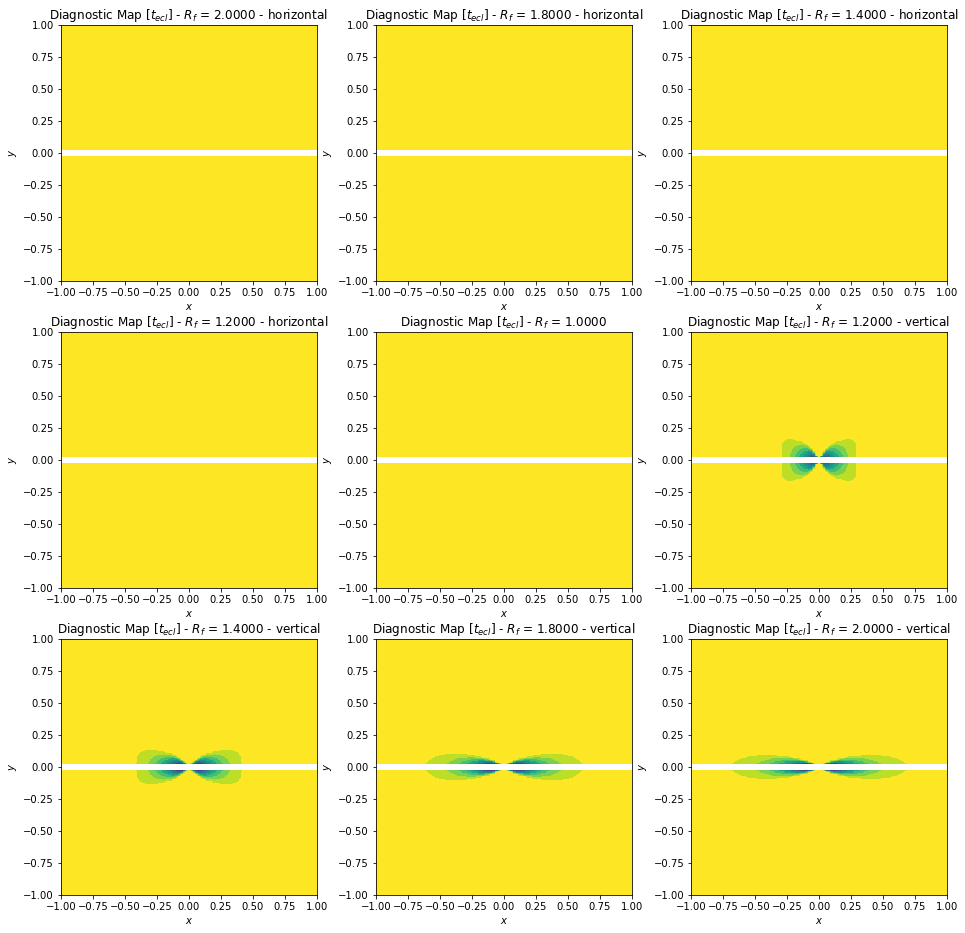

vmin = -0.2416812012488867, vmax = 4.6629367034256575e-15


In [6]:
indices = [0, 4, 12, 16, 20, 24, 28, 36, 40]
plot_property(grid_demo.diagnostic_map, indices)
print(f"vmin = {grid_demo.diagnostic_map.vmin}, vmax = {grid_demo.diagnostic_map.vmax}")

We can see that the absolute deviation goes all the way up to 0.24 which is quite large. This means that for some grid point the difference between the actual $f_R$ of the point and the one implied by the slice of the grid is 0.24.

This means that I could be looking at a point and expecting $f_R$ to be 1.6, when in actuality it is 1.36. For this reason we choose high ```num_fxfy``` to reduce this deviation.

In [7]:
grid = ShallotGrid(
    parameters = parameters,
    num_fxfy = 5001,
    logging_level = logging.INFO,
    keep_diagnostics = True,
    intermittent_saving = False
)

2024-03-02 17:02:20,231 - INFO     - _build_grid: building y = 1/101
  0%|          | 0/101 [00:00<?, ?it/s]

100%|██████████| 101/101 [00:08<00:00, 11.34it/s]
2024-03-02 17:02:29,139 - INFO     - _build_grid: building y = 2/101
100%|██████████| 101/101 [00:08<00:00, 11.84it/s]
2024-03-02 17:02:37,672 - INFO     - _build_grid: building y = 3/101
100%|██████████| 101/101 [00:08<00:00, 11.55it/s]
2024-03-02 17:02:46,422 - INFO     - _build_grid: building y = 4/101
100%|██████████| 101/101 [00:08<00:00, 11.32it/s]
2024-03-02 17:02:55,342 - INFO     - _build_grid: building y = 5/101
100%|██████████| 101/101 [00:08<00:00, 11.72it/s]
2024-03-02 17:03:03,962 - INFO     - _build_grid: building y = 6/101
100%|██████████| 101/101 [00:08<00:00, 11.24it/s]
2024-03-02 17:03:12,948 - INFO     - _build_grid: building y = 7/101
100%|██████████| 101/101 [00:08<00:00, 11.35it/s]
2024-03-02 17:03:21,847 - INFO     - _build_grid: building y = 8/101
100%|██████████| 101/101 [00:08<00:00, 11.45it/s]
2024-03-02 17:03:30,671 - INFO     - _build_grid: building y = 9/101
100%|██████████| 101/101 [00:09<00:00, 10.81it/s

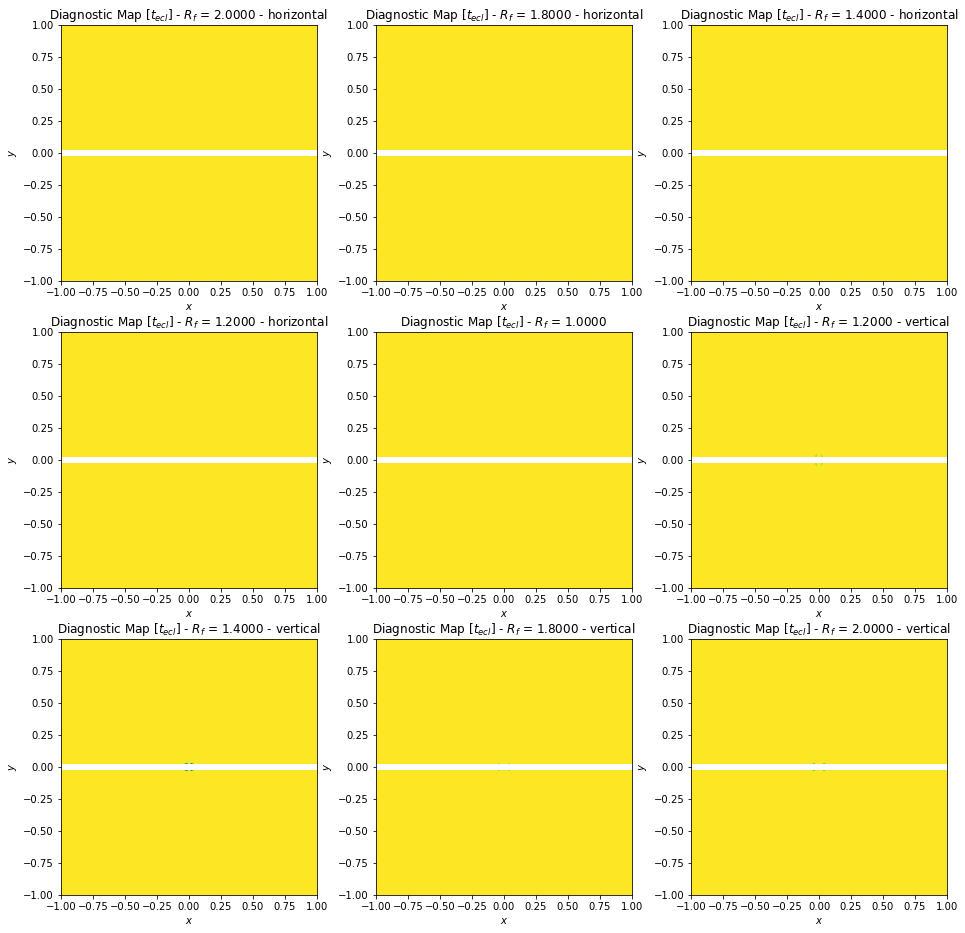

vmin = -0.0008563492990050214, vmax = 4.6629367034256575e-15


In [8]:
plot_property(grid.diagnostic_map, indices)
print(f"vmin = {grid.diagnostic_map.vmin}, vmax = {grid.diagnostic_map.vmax}")

Now we have very little deviation between the value in the grid and the expected value (max 0.0009). The larger ```num_fxfy``` the smaller this deviation becomes but also the computation time increases.

## Exploring the Data
From here we now have a fully established grid. We can use get methods to retrieve the data stored in the different properties associated with the grid. The properties are:

1. Disc Radius $R_\mathrm{disc}$ [$\Delta_\mathrm{ecl}$]
2. Inclination $i$ [$^\circ$]
3. Tilt $\phi$ [$^\circ$]
4. $f_x$ [-]
5. $f_y$ [-]
6. Diagnostics (as shown above this is a deviation in $R_\mathrm{disc}$ [$\Delta_\mathrm{ecl}$])

Each of these properties has a set of methods related to them.

- ```set_mask()``` each property can have its own set of restrictions
- ```get_data()``` to retrieve the data from the property with or without the provided mask
- ```plot_cube()``` plots a scrollable data cube
- ```plot_slice()``` plots a 2D slice of the grid
- ```set_contrast_parameters()``` to change the colourmap vmin and vmax (default is the whole range of data)

These methods are accessible through the property. i.e. grid.disk_radius.set_mask()

We can also retrieve the data directly from the ShallotGrid through a get_{property} method, i.e. ```grid.get_disk_radius(masked=?)```


## Analysis
Analysis is done mainly through two fundamental astrophysical limits imposed. The Hill sphere of the proposed disc, and the gradients measured in the light curve.

### Hill Sphere
This sets a restriction on the disc radius based on stability arguments. This restriction is easy to implement and is equivalent to setting a mask to the disk radius property. For clarity it is bubbled up into the ShallotGrid object.

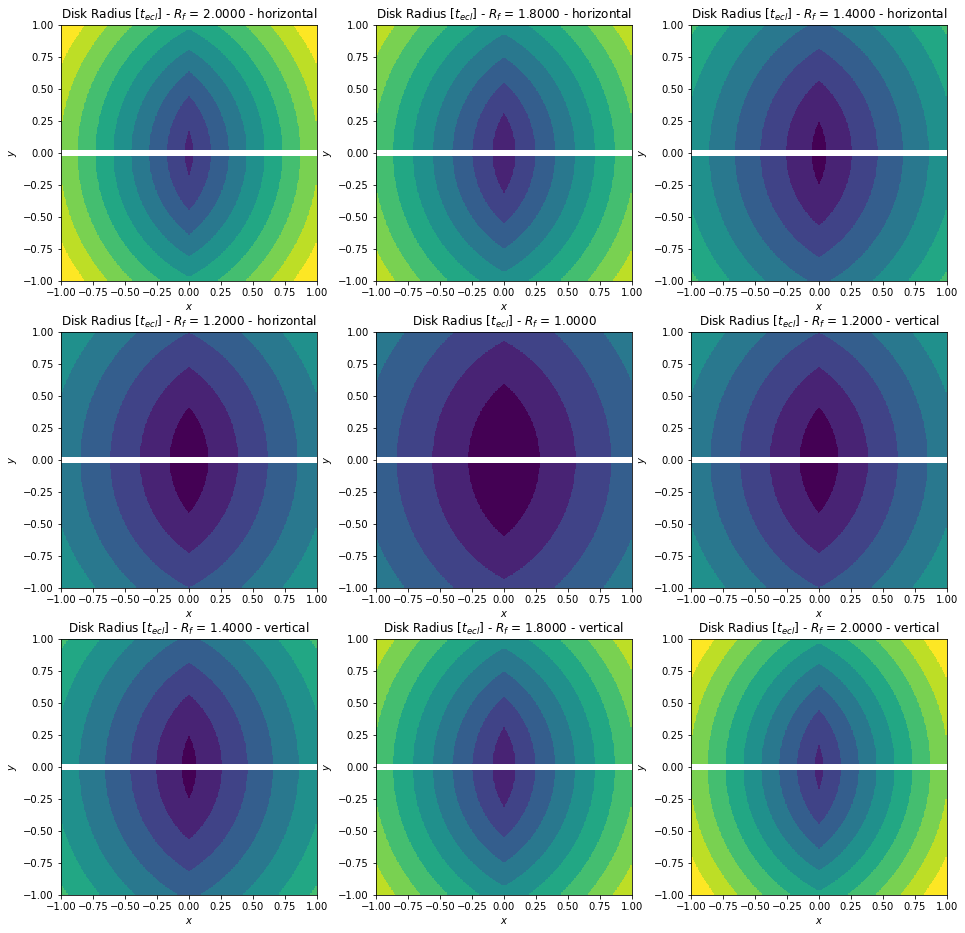

In [15]:
hill_radius = 4

grid.generate_hill_radius_mask(
    hill_radius=hill_radius
)

plot_property(grid.disk_radius, indices)

### Gradient Analysis
The other way to make restrictions is to analyse the light curve data. We look for gradients and transform them for use with the Shallot Explorer to subsequently make additional cuts to the parameter space, leaving all viable solutions. 

#### Light Curve Analysis
Look for gradients in the light curve data, with enough points. Fit a straight line to measure the light curve gradient ($\frac{dI}{dt}$).

/var/folders/y6/v7frbzt57z32s5r80d4t6d680000gn/T/ipykernel_23687/3640015425.py:22: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  flux[mask] = flux[mask] - 0.4 + 0.5 * (time[mask] - 3.8)


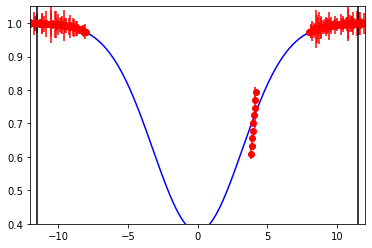

In [7]:
def normal_pdf(x, mu=0, sigma=1):
        sqrt_two_pi = np.sqrt(np.pi * 2)
        return np.exp(-(x - mu) ** 2 / 2 / sigma ** 2) / (sqrt_two_pi * sigma)

def generate_light_curve():
    """
    This function is specifically for this tutorial, and is in no way, shape
    or form, a way to simulate light curves. It is completely empirical.
    """
    eclipse_duration = 23
    num_photometry = 1001
    time = np.linspace(-eclipse_duration, eclipse_duration, num_photometry)
    flux = np.ones_like(time)
    np.random.seed(0)
    error = 0.02 * np.random.normal(0, 1, num_photometry)
    
    flux_norm = normal_pdf(time, 0, 3.2)
    flux_norm[(time>-8)*(time<8)] = 0
    flux = flux - 5 * flux_norm

    mask = [(time > 3.8) * (time < 4.2)]
    flux[mask] = flux[mask] - 0.4 + 0.5 * (time[mask] - 3.8)

    bad_elements1 = (time > -8) * (time < 3.8)
    time = np.delete(time, bad_elements1)
    flux = np.delete(flux, bad_elements1)
    error = np.delete(error, bad_elements1)
    bad_elements2 = (time > 4.2) * (time < 8)
    time = np.delete(time, bad_elements2)
    flux = np.delete(flux, bad_elements2)
    error = np.delete(error, bad_elements2)

    return time, flux, error

time, flux, error = generate_light_curve()

t_gauss = np.linspace(-12, 12, 1001)
f_gauss = 1 - 5 * normal_pdf(t_gauss, 0, 3.2)
plt.figure()
plt.errorbar(time, flux, yerr=error, fmt="o", color="r", ls="")
plt.plot(t_gauss, f_gauss,'b-')
plt.gca().axvline(x=-11.5, color="k")
plt.gca().axvline(x=11.5, color="k")
plt.ylim(0, 1.1)
plt.xlim(-12, 12)
plt.ylim(0.4, 1.05)

plt.show()

In [53]:
times = np.array([4.])
light_curve_gradients = np.array([0.5])
light_curve_gradient_errors = np.array([0.1])
transmission_changes = np.array([1.])

#### Transformation for Shallot Explorer
The light curve gradients can be converted to local tangents of the disc at said location by realising the following. The light curve measures change in intensity over time, when we are looking for change in intensity (area occulted) in space. We can convert to position from time by introducing the transverse velocity.

In [54]:
transverse_velocity = 0.8
limb_darkening = 0.8
eclipse_duration = 23

grid.set_eclipse_parameters(
    eclipse_duration = eclipse_duration, 
    transverse_velocity = transverse_velocity, 
    limb_darkening = limb_darkening
)

2024-03-05 11:28:31,881 - INFO     - set_eclipse_parameters: gradients set to None due to dependency on eclipse duration
2024-03-05 11:28:31,883 - INFO     - _reset_gradient_fit: gradient fit has been cleared


#### Implementation of Gradients
Now that the conversion is complete, we can add the gradients to the Shallot Explorer and subsequently make the parameter space cuts as necessary.

In [55]:
grid.add_gradients(
    times = times, 
    light_curve_gradients = light_curve_gradients, 
    light_curve_gradient_errors = light_curve_gradient_errors, 
    transmission_changes = transmission_changes
)

2024-03-05 11:28:32,245 - INFO     - add_gradients: adding 1 gradients
100%|██████████| 1/1 [00:00<00:00, 41.23it/s]
2024-03-05 11:28:32,278 - INFO     - _reset_gradient_fit: gradient fit has been cleared


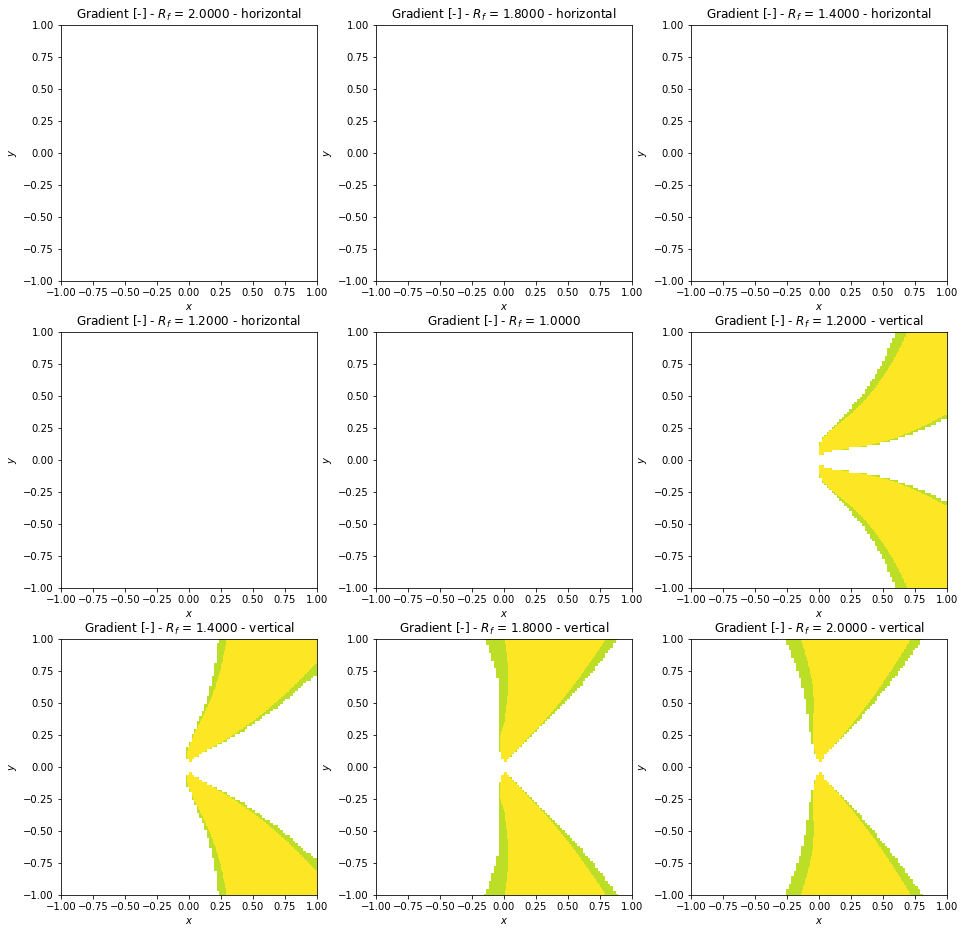

In [56]:
plot_property(grid.gradients[0], indices)